<a href="https://colab.research.google.com/github/benslimanh/Research_Analysis/blob/main/Islamic_vs_Traditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1066975862.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='2y')['Close']
[*********************100%***********************]  2 of 2 completed

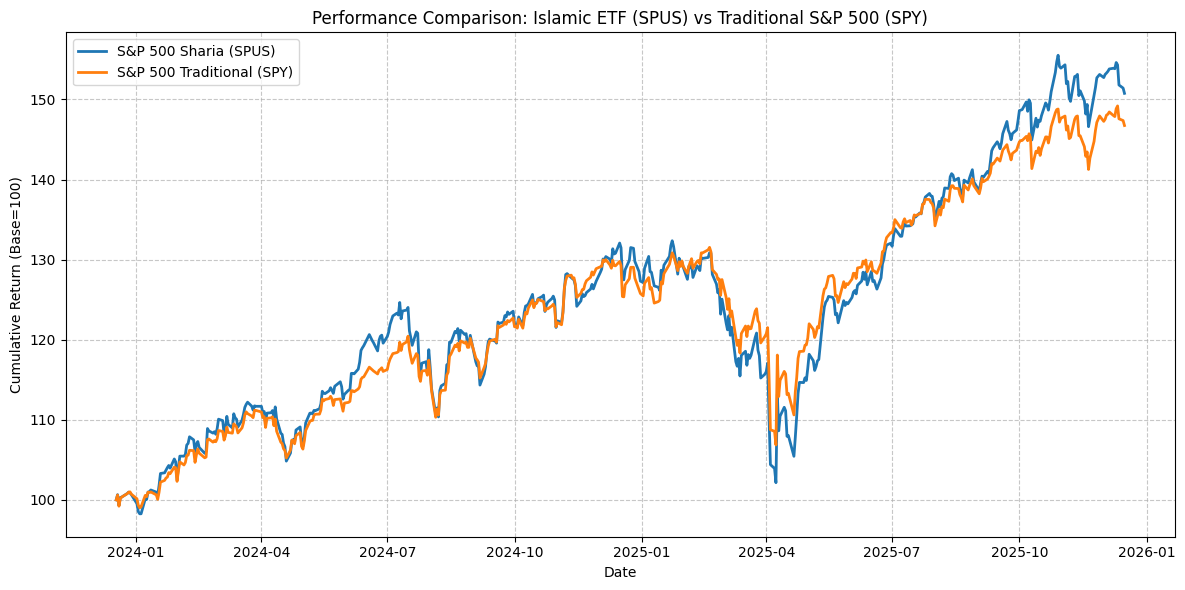

In [ ]:
# 1. Install necessary library
!pip install yfinance

# 2. Import libraries
import yfinance as yf
import matplotlib.pyplot as plt

# 3. Define Tickers
# SPUS: S&P 500 Sharia (Islamic)
# SPY: S&P 500 Traditional (Conventional)
tickers = ['SPUS', 'SPY']

# 4. Download historical data (Last 2 years)
print("Downloading market data...")
data = yf.download(tickers, period='2y')['Close']

# 5. Normalize data (Rebase to 100 to compare percentage growth)
normalized_data = (data / data.iloc[0]) * 100

# 6. Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(normalized_data, linewidth=2)
plt.title('Performance Comparison: Islamic ETF (SPUS) vs Traditional S&P 500 (SPY)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Base=100)')
plt.legend(['S&P 500 Sharia (SPUS)', 'S&P 500 Traditional (SPY)'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--- Risk Analysis Report (Annualized Volatility) ---
Islamic Fund (SPUS) Risk:    18.95%
Traditional Fund (SPY) Risk: 16.39%

⚠️ Conclusion: The Islamic Fund was MORE volatile (Higher Risk).


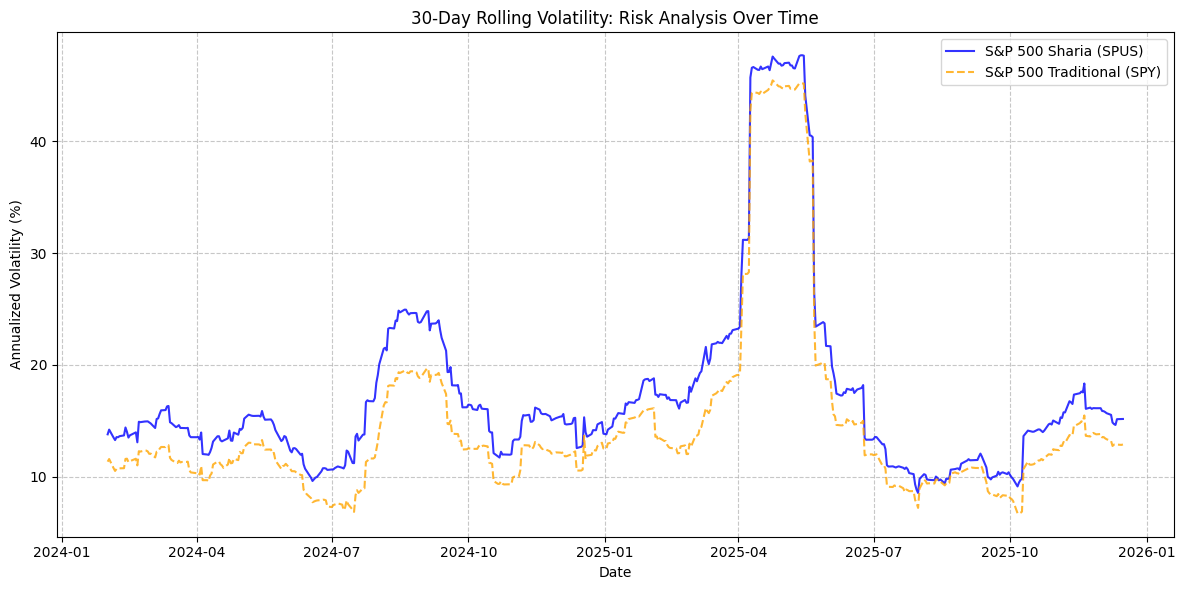

In [ ]:
import numpy as np

# 1. Calculate Daily Returns
daily_returns = data.pct_change().dropna()

# 2. Calculate Annualized Volatility (Standard Deviation * sqrt(252 trading days))
annual_volatility = daily_returns.std() * np.sqrt(252) * 100

# --- PART A: Print Statistics ---
print("--- Risk Analysis Report (Annualized Volatility) ---")
print(f"Islamic Fund (SPUS) Risk:    {annual_volatility['SPUS']:.2f}%")
print(f"Traditional Fund (SPY) Risk: {annual_volatility['SPY']:.2f}%")

if annual_volatility['SPUS'] < annual_volatility['SPY']:
    print("\n✅ Conclusion: The Islamic Fund was LESS volatile (Safer).")
else:
    print("\n⚠️ Conclusion: The Islamic Fund was MORE volatile (Higher Risk).")

# --- PART B: Plot Rolling Volatility (Risk over Time) ---
# Calculate 30-Day Rolling Volatility
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252) * 100

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility['SPUS'], label='S&P 500 Sharia (SPUS)', color='blue', alpha=0.8)
plt.plot(rolling_volatility['SPY'], label='S&P 500 Traditional (SPY)', color='orange', linestyle='--', alpha=0.8)

plt.title('30-Day Rolling Volatility: Risk Analysis Over Time')
plt.ylabel('Annualized Volatility (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()